In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\Users\britn\anaconda3\envs\iod\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv('../DATA/Sleep_health_and_lifestyle_dataset.csv', index_col = 'Person ID')

In [3]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [13]:
df.groupby(['Gender', 'Sleep Duration']).size().min()

1

In [15]:
df.groupby('Gender' == 'Female' )['Sleep Duration'].mean()

KeyError: False

In [16]:
# Filter the data for only "Female" gender
female_data = df[df['Gender'] == 'Female']

# Calculate the mean sleep duration for "Female" gender
mean_duration_female = female_data['Sleep_Duration'].mean()

KeyError: 'Sleep_Duration'

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.0,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.8,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.0,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.0,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.0,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.0,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.0,10000.0


In [5]:
df.Age.value_counts()

43    34
44    30
37    20
38    20
50    20
31    18
32    17
53    17
59    16
39    15
45    14
33    13
30    13
29    13
35    12
36    12
41    12
49    11
57     9
52     9
42     9
51     8
54     7
58     6
28     5
40     4
48     3
55     2
56     2
34     2
27     1
Name: Age, dtype: int64

In [6]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [7]:
age_class = []
for x in df.Age:
    if x < 30:
        age_class.append('27-30')
    elif 30 <= x < 40:
        age_class.append('30-39')
    elif 40 <= x < 50:
        age_class.append('40-49')
    elif 50 <= x < 60:
        age_class.append('50-59')

In [8]:
df['age_group'] = age_class

In [9]:
df['Sleep Duration'].describe().T

count    374.000000
mean       7.132086
std        0.795657
min        5.800000
25%        6.400000
50%        7.200000
75%        7.800000
max        8.500000
Name: Sleep Duration, dtype: float64

In [10]:
df['Sleep Duration'].median()

7.2

In [11]:
df['Sleep Duration'].mode()

0    7.2
dtype: float64

In [12]:
df['Quality of Sleep'].describe().T

count    374.000000
mean       7.312834
std        1.196956
min        4.000000
25%        6.000000
50%        7.000000
75%        8.000000
max        9.000000
Name: Quality of Sleep, dtype: float64

In [13]:
df['Quality of Sleep'].median()

7.0

In [14]:
df['Quality of Sleep'].mode()

0    8
dtype: int64

In [15]:
df['Daily Steps'].describe().T

count      374.000000
mean      6816.844920
std       1617.915679
min       3000.000000
25%       5600.000000
50%       7000.000000
75%       8000.000000
max      10000.000000
Name: Daily Steps, dtype: float64

In [16]:
df['Daily Steps'].median()

7000.0

In [17]:
df['Daily Steps'].mode()

0    8000
dtype: int64

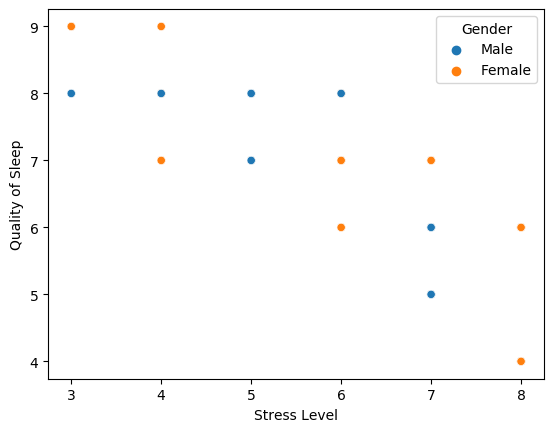

In [18]:
sns.scatterplot(data=df, x='Stress Level', y='Quality of Sleep', hue = 'Gender')
plt.show()

In [19]:
df['Stress Level'].value_counts()

3    71
8    70
4    70
5    67
7    50
6    46
Name: Stress Level, dtype: int64

In [20]:
df['Quality of Sleep'].value_counts()

8    109
6    105
7     77
9     71
5      7
4      5
Name: Quality of Sleep, dtype: int64

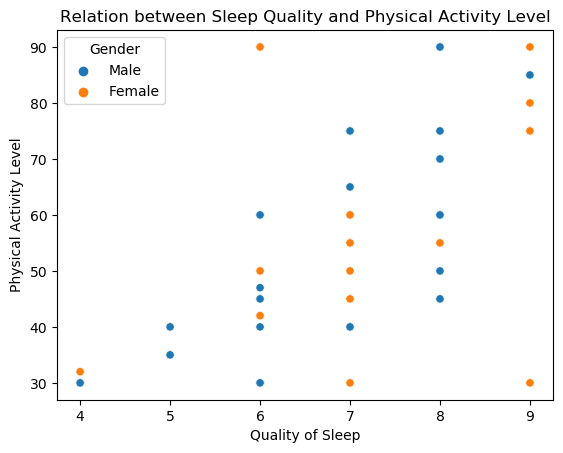

In [21]:
sns.scatterplot(data=df, x='Quality of Sleep', y='Physical Activity Level', hue = 'Gender')
plt.title('Relation between Sleep Quality and Physical Activity Level')
plt.show()

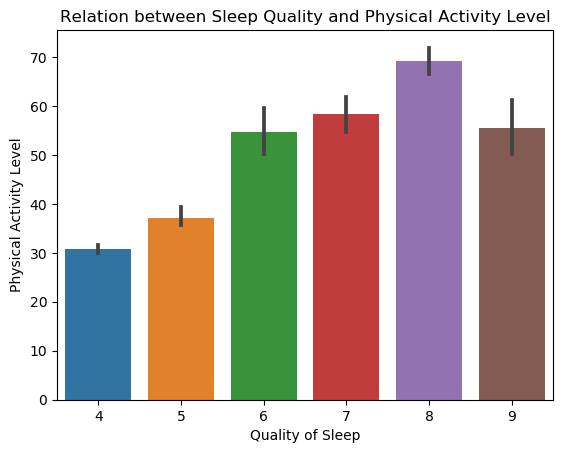

In [22]:
sns.barplot(data=df, x='Quality of Sleep', y='Physical Activity Level')
plt.title('Relation between Sleep Quality and Physical Activity Level')
plt.show()

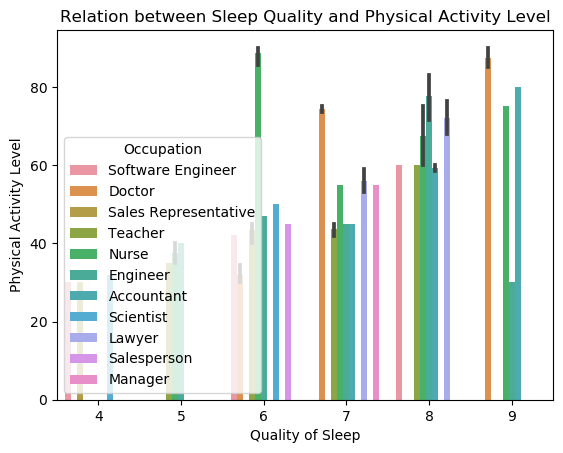

In [23]:
sns.barplot(data=df, x='Quality of Sleep', y='Physical Activity Level', hue = 'Occupation')
plt.title('Relation between Sleep Quality and Physical Activity Level')
plt.show()

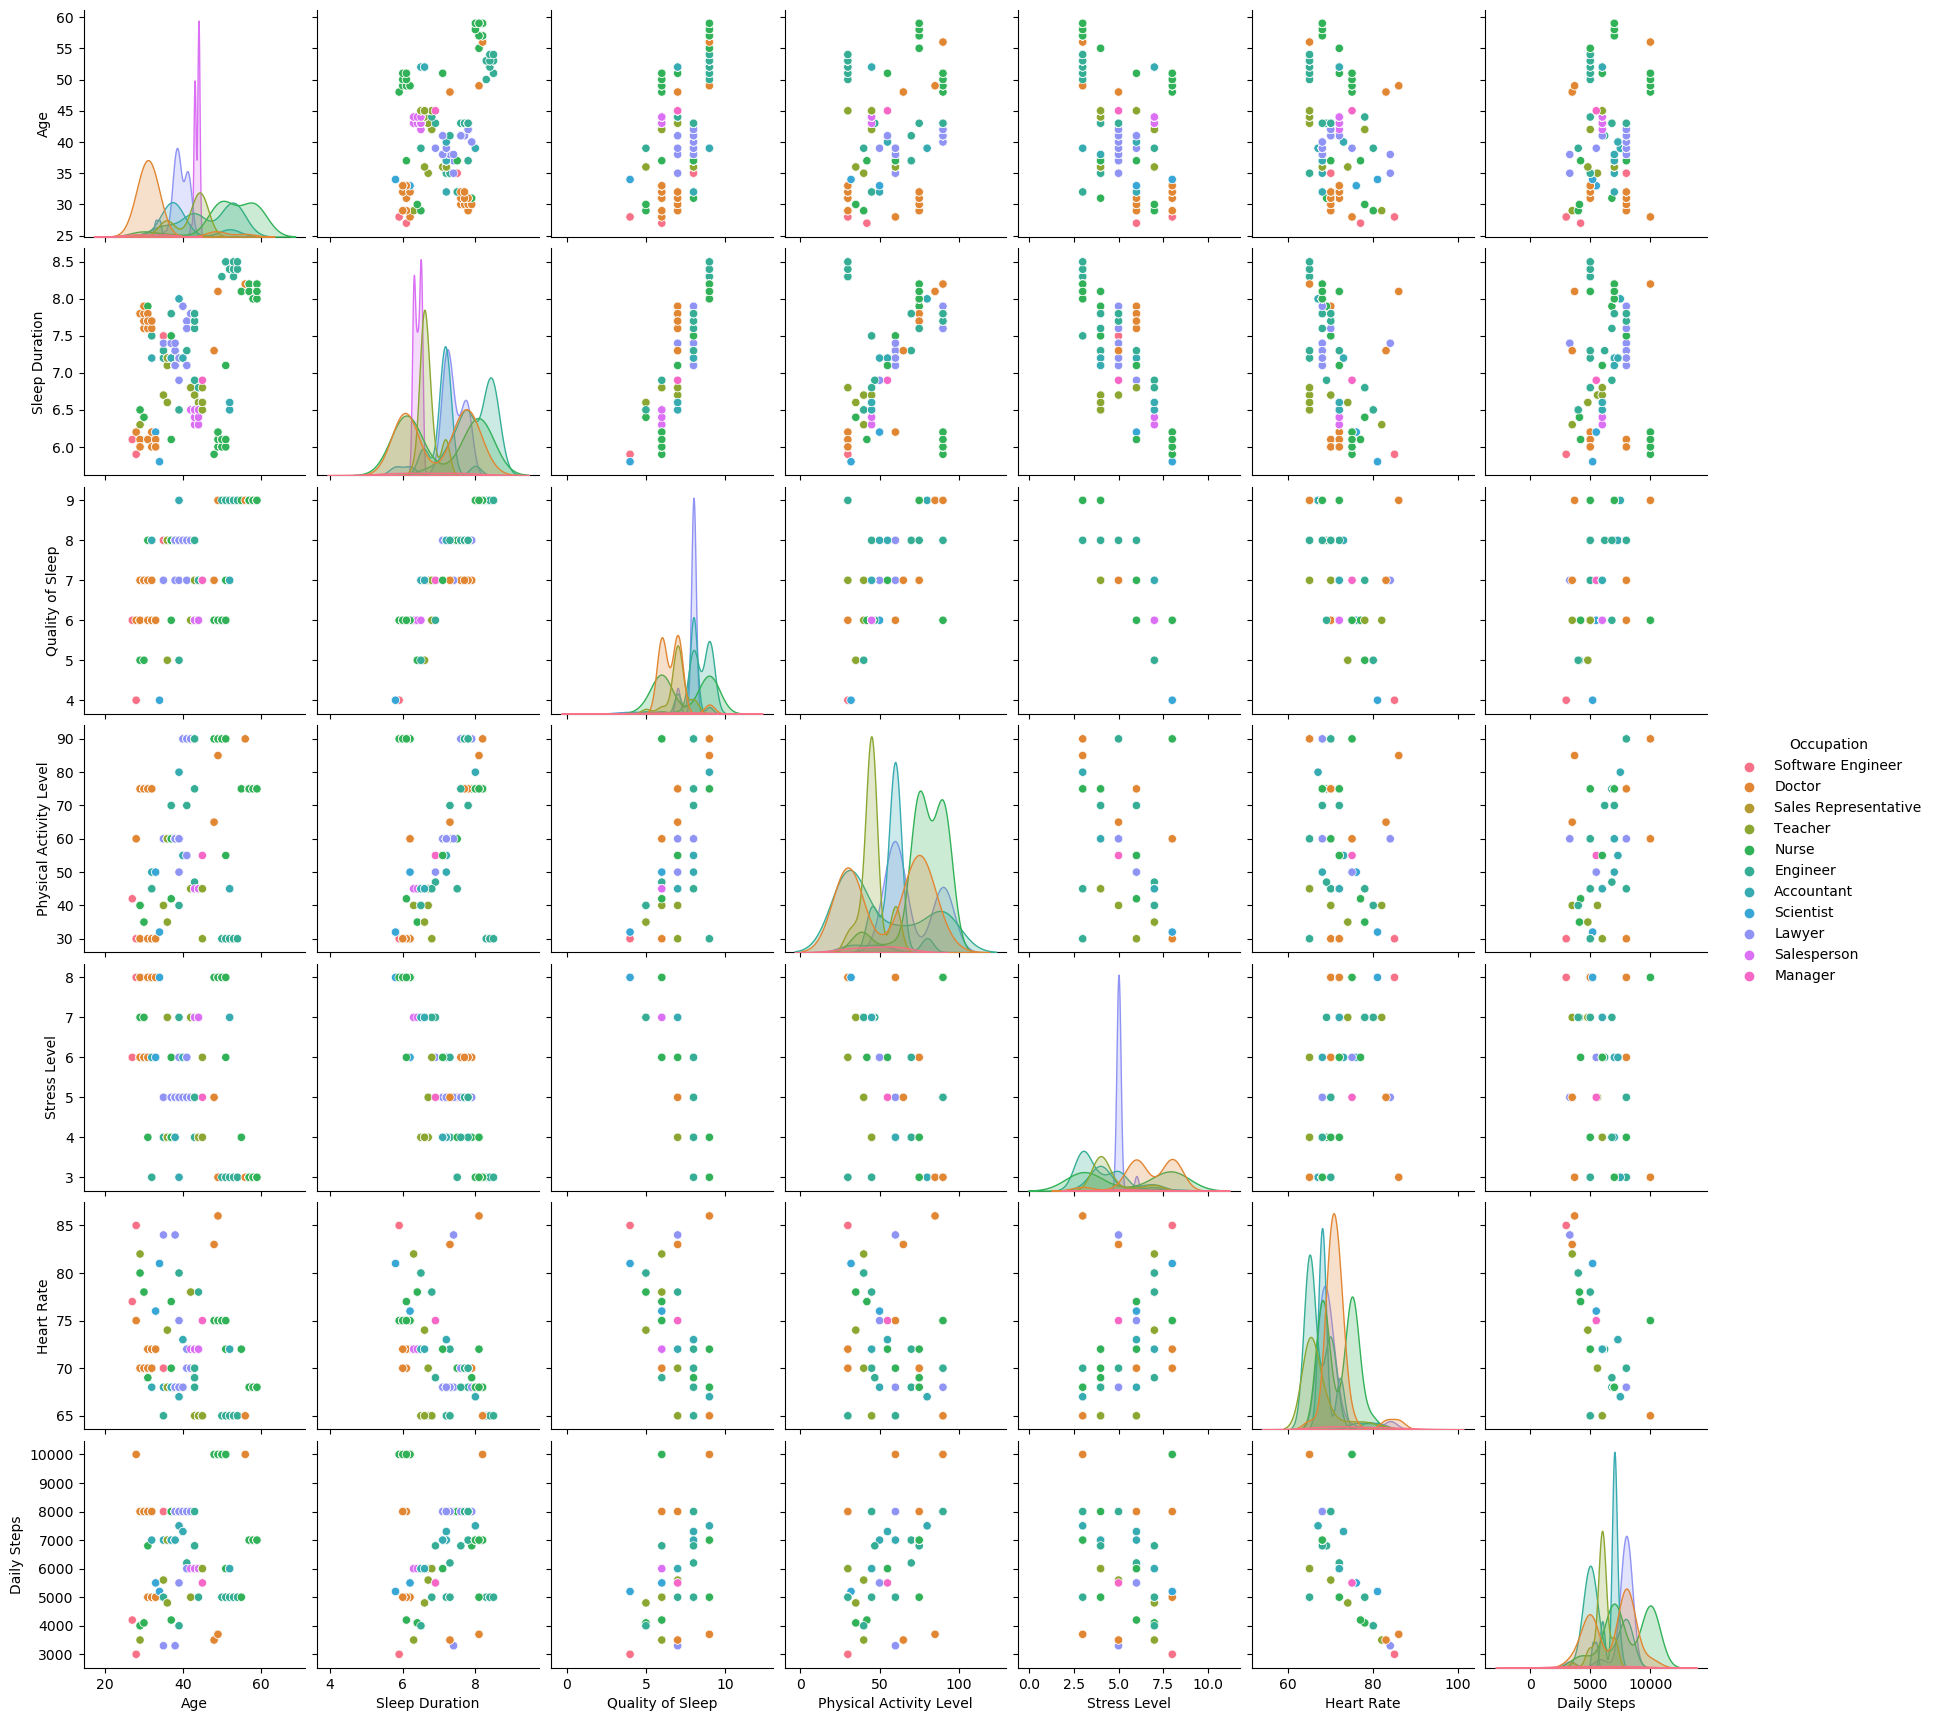

In [24]:
sns.pairplot(data=df, hue="Occupation")

C:\Users\britn\anaconda3\envs\iod\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\britn\anaconda3\envs\iod\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 59.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\britn\anaconda3\envs\iod\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 74.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\britn\anaconda3\envs\iod\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 66.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\britn\anaconda3\envs\iod\lib\site-packages\seaborn\categori

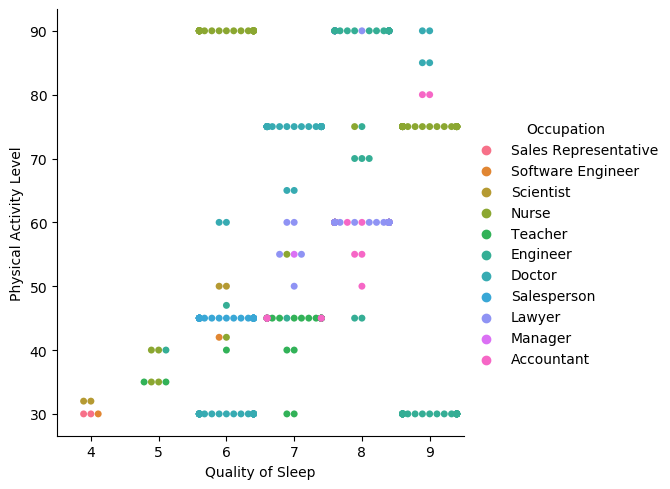

In [25]:
sns.catplot(data=df, kind="swarm", x="Quality of Sleep", y="Physical Activity Level", hue="Occupation")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 1 to 374
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
 12  age_group                374 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 49.0+ KB


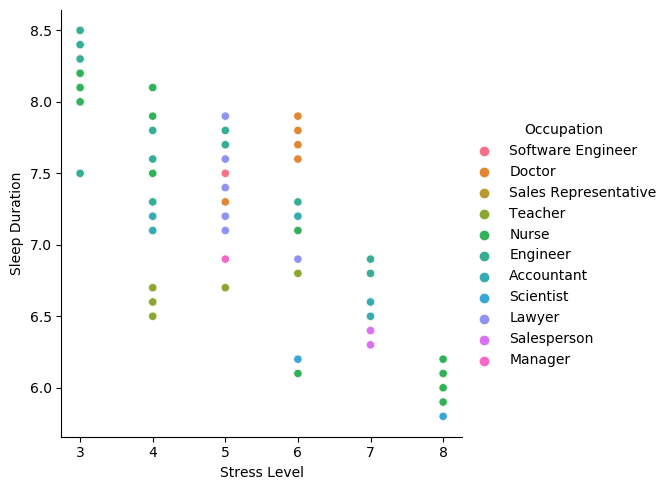

In [27]:
sns.relplot(
    data=df,
    x="Stress Level", y="Sleep Duration", hue="Occupation"
)

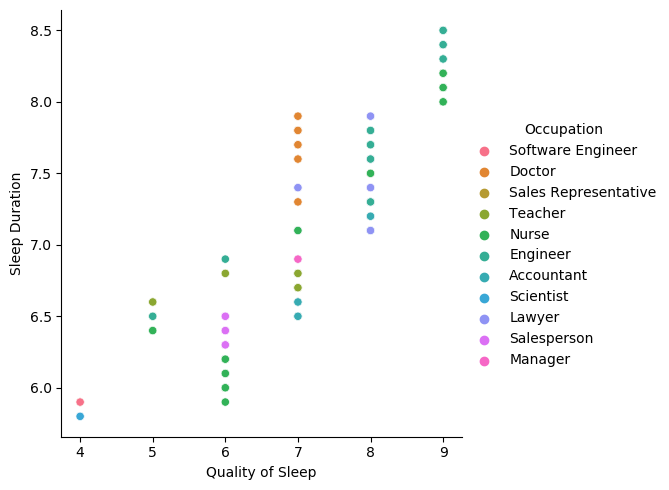

In [28]:
sns.relplot(
    data=df,
    x="Quality of Sleep", y="Sleep Duration", hue="Occupation"
)

In [29]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'age_group'],
      dtype='object')

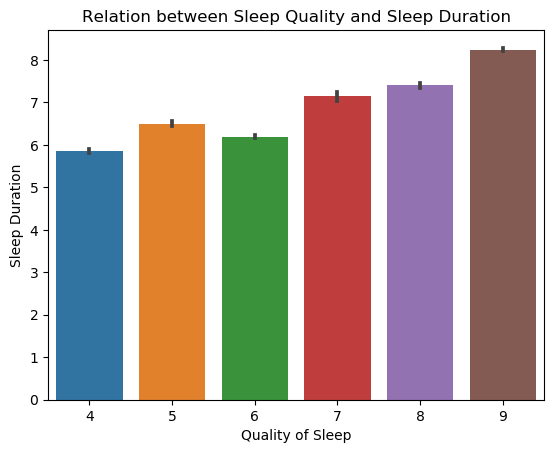

In [30]:
sns.barplot(data=df, x='Quality of Sleep', y='Sleep Duration')
plt.title('Relation between Sleep Quality and Sleep Duration')
plt.show()

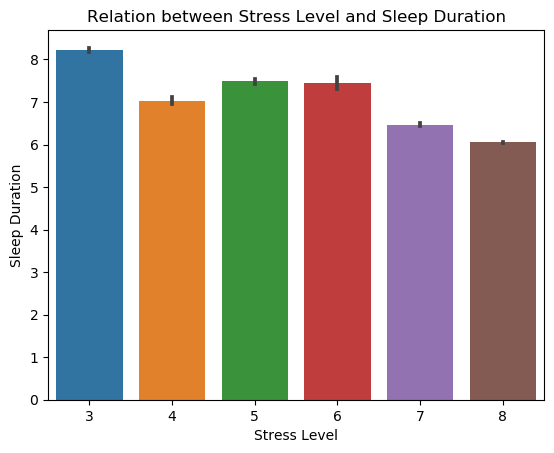

In [31]:
sns.barplot(data=df, x='Stress Level', y='Sleep Duration')
plt.title('Relation between Stress Level and Sleep Duration')
plt.show()

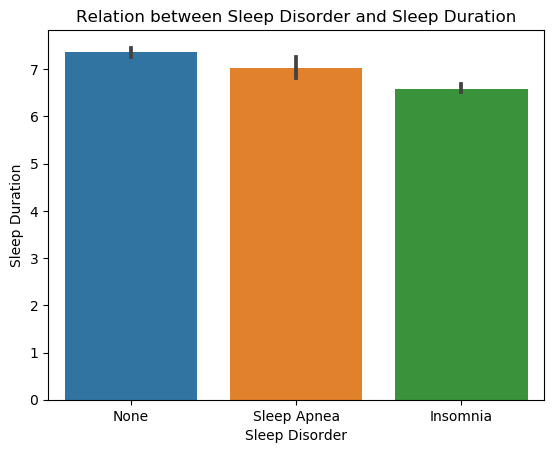

In [32]:
sns.barplot(data=df, x= 'Sleep Disorder', y='Sleep Duration')
plt.title('Relation between Sleep Disorder and Sleep Duration')
plt.show()

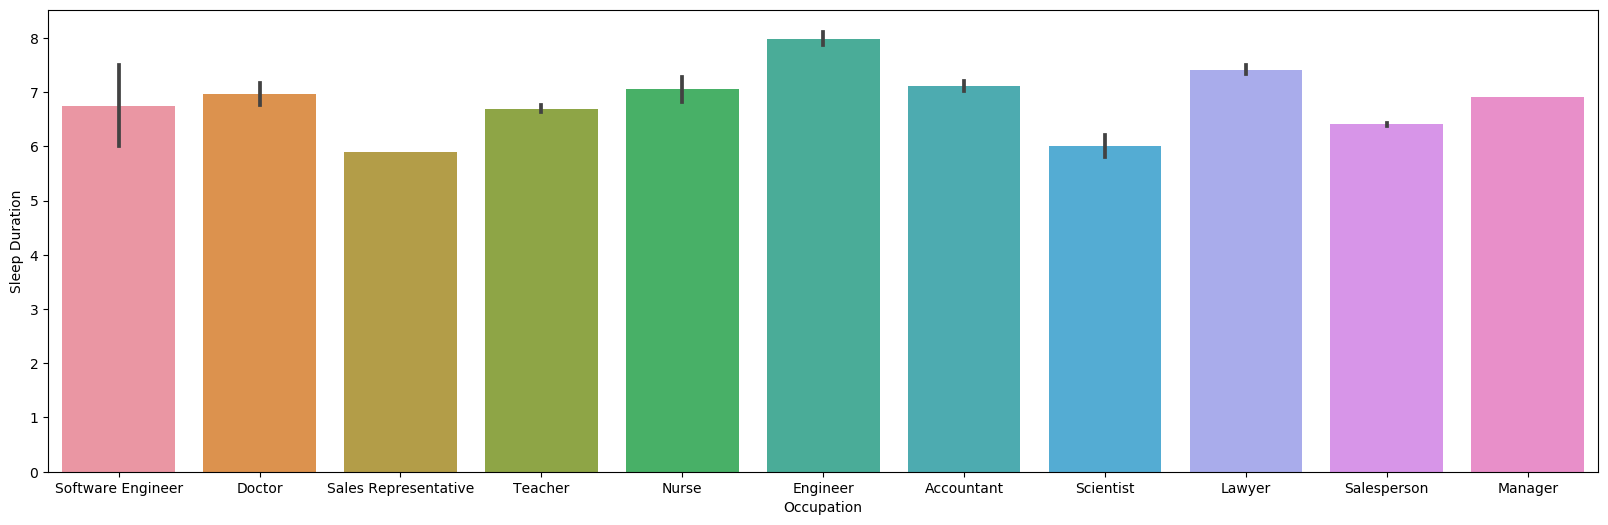

In [33]:
# Assuming df is already defined
# Set the figure size
plt.figure(figsize=(20, 6))

# Your seaborn plotting code here
sns.barplot(data=df, x='Occupation', y='Sleep Duration')

plt.show()

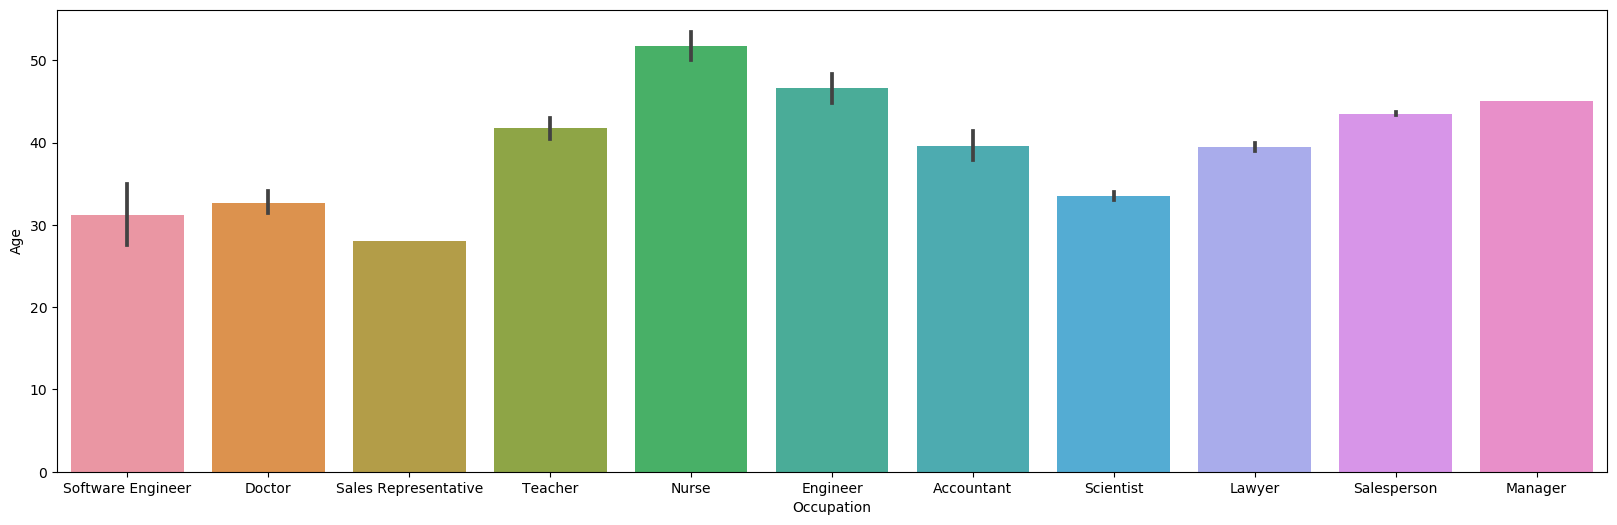

In [34]:
# Assuming df is already defined
# Set the figure size
plt.figure(figsize=(20, 6))

# Your seaborn plotting code here
sns.barplot(data=df, x='Occupation', y='Age')

plt.show()

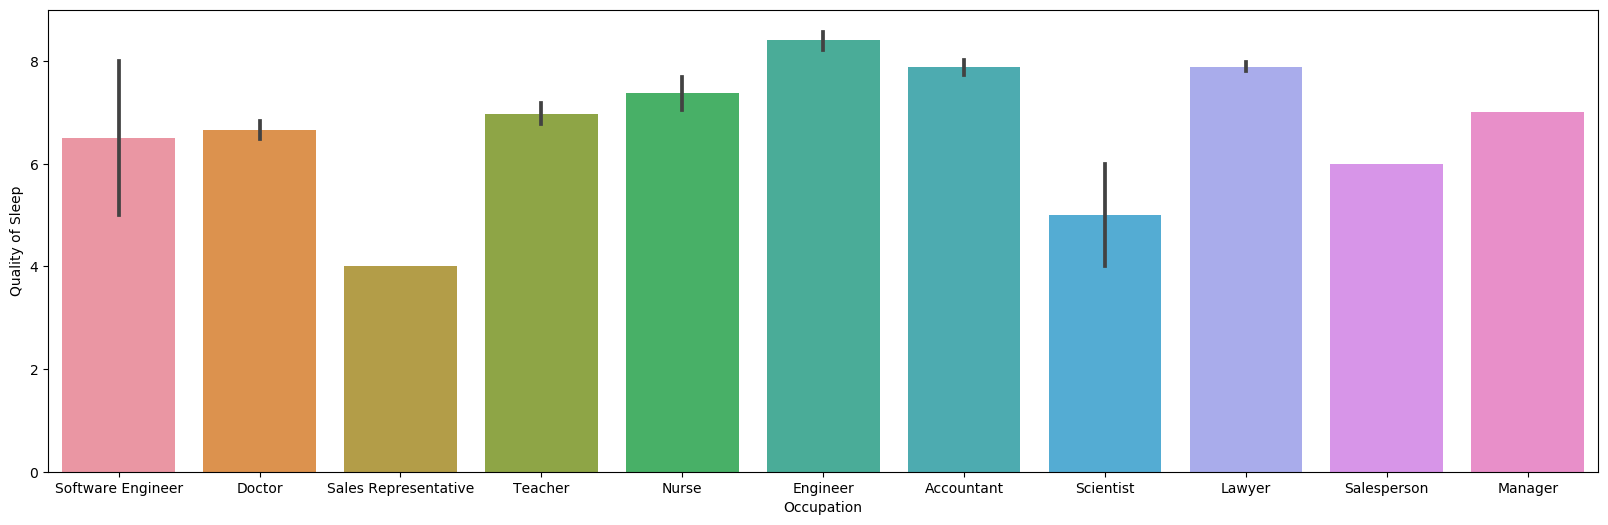

In [35]:
# Assuming df is already defined
# Set the figure size
plt.figure(figsize=(20, 6))

# Your seaborn plotting code here
sns.barplot(data=df, x='Occupation', y='Quality of Sleep')

plt.show()

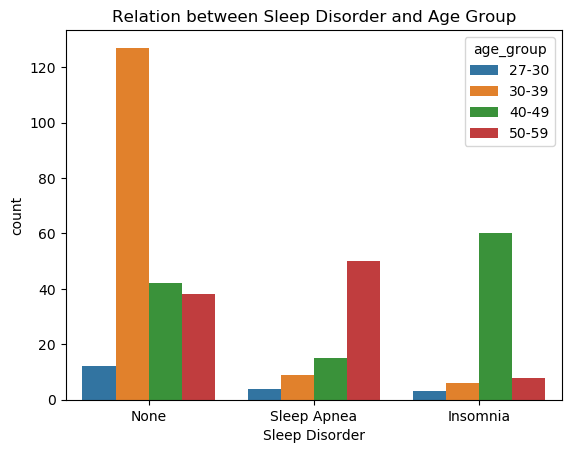

In [36]:
sns.countplot(data=df, x='Sleep Disorder', hue='age_group')
plt.title('Relation between Sleep Disorder and Age Group')
plt.show()

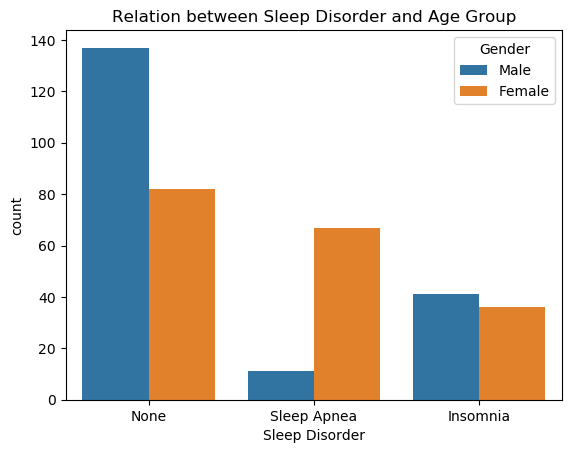

In [37]:
sns.countplot(data=df, x='Sleep Disorder', hue='Gender')
plt.title('Relation between Sleep Disorder and Age Group')
plt.show()

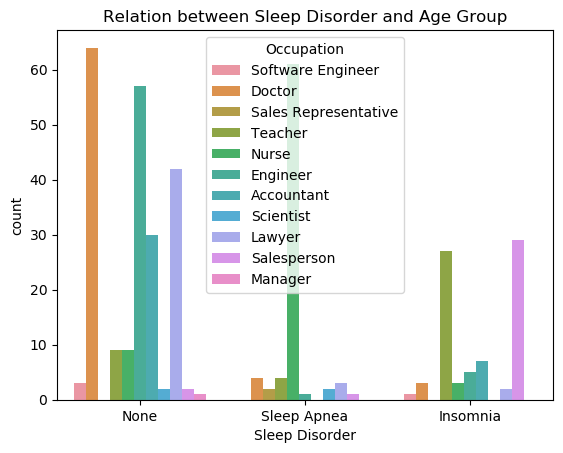

In [38]:
sns.countplot(data=df, x='Sleep Disorder', hue='Occupation')
plt.title('Relation between Sleep Disorder and Age Group')
plt.show()

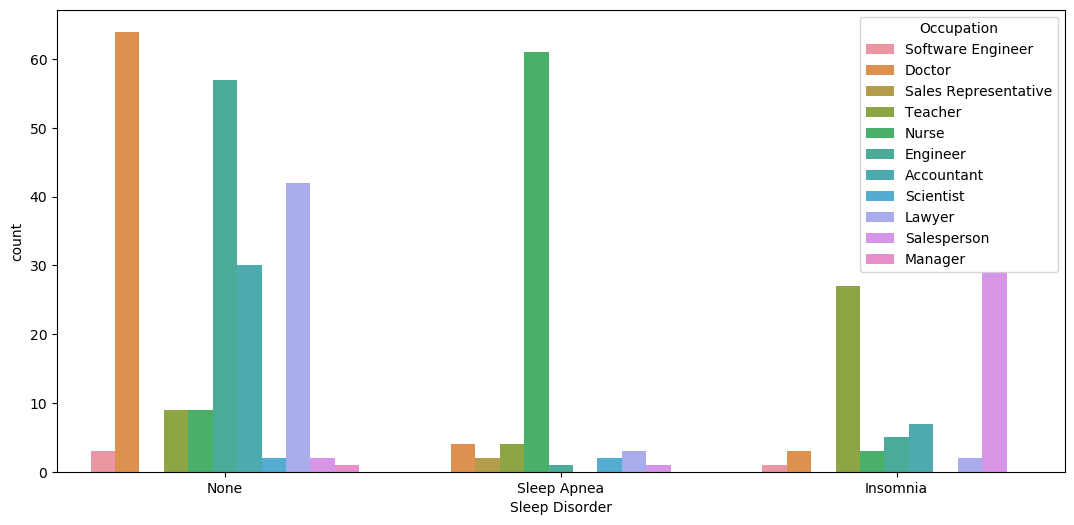

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13,6))
# Use a countplot to display the counts of each category
sns.countplot(data=df, x='Sleep Disorder', hue='Occupation')

# Show the plot
plt.show()

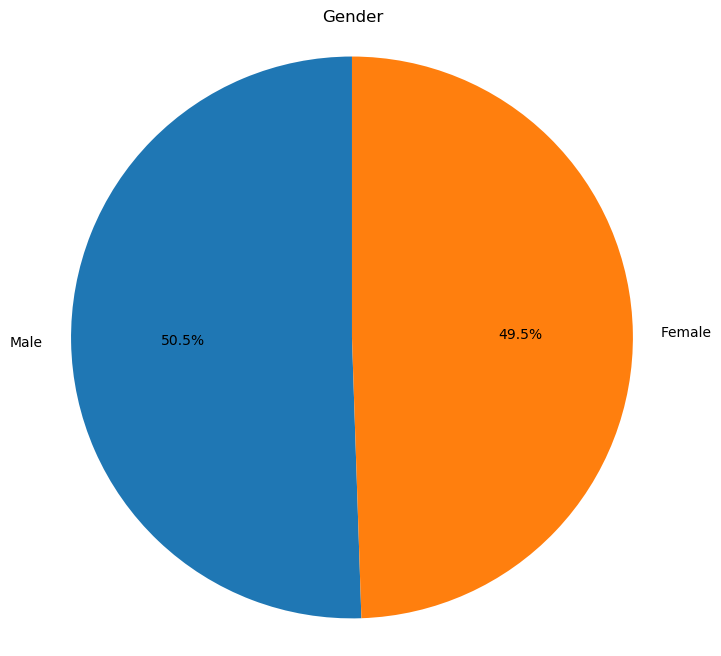

In [40]:
# Calculate the counts of each unique value in the 'Gender' column
gender_counts = df['Gender'].value_counts()

# Extract the labels and sizes from the counts
labels = gender_counts.index
sizes = gender_counts.values

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Gender')
plt.show()

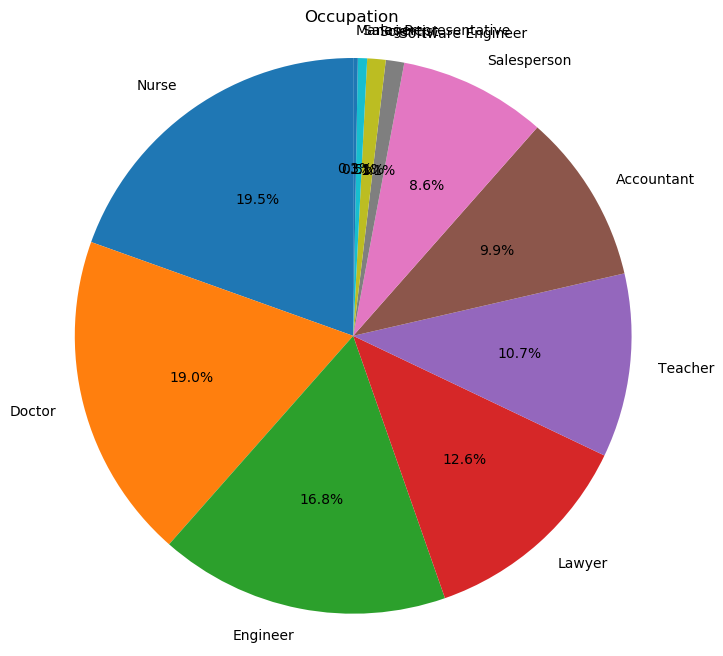

In [41]:
# Calculate the counts of each unique value in the 'Gender' column
gender_counts = df['Occupation'].value_counts()

# Extract the labels and sizes from the counts
labels = gender_counts.index
sizes = gender_counts.values

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Occupation')
plt.show()

In [42]:
df.Occupation.value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

In [43]:
occupation_counts = df['Occupation'].value_counts()
occupation_percentages = (occupation_counts / len(df)) * 100

In [44]:
occupation_percentages

Nurse                   19.518717
Doctor                  18.983957
Engineer                16.844920
Lawyer                  12.566845
Teacher                 10.695187
Accountant               9.893048
Salesperson              8.556150
Software Engineer        1.069519
Scientist                1.069519
Sales Representative     0.534759
Manager                  0.267380
Name: Occupation, dtype: float64

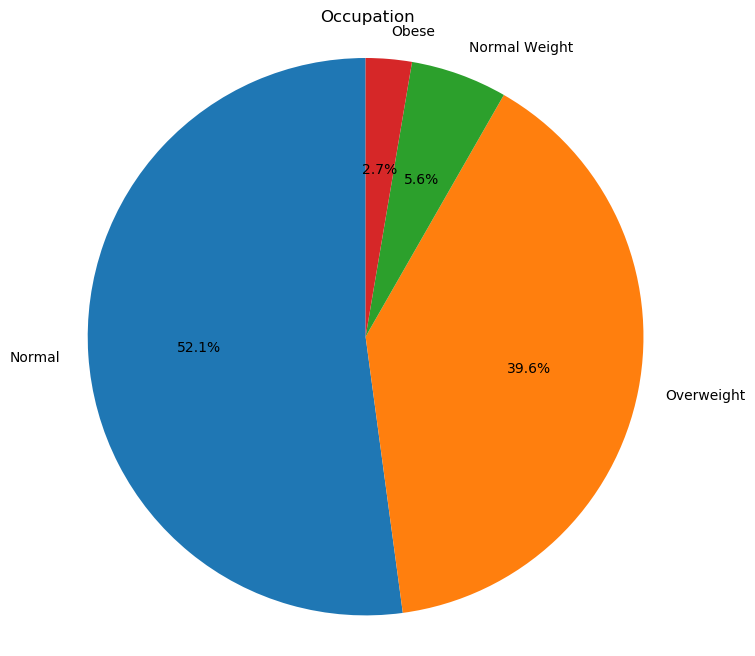

In [45]:
# Calculate the counts of each unique value in the 'Gender' column
gender_counts = df['BMI Category'].value_counts()

# Extract the labels and sizes from the counts
labels = gender_counts.index
sizes = gender_counts.values

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Occupation')
plt.show()

In [46]:
bmi = df['BMI Category'].value_counts()
bmi1 = (bmi / len(df)) * 100

In [47]:
bmi1

Normal           52.139037
Overweight       39.572193
Normal Weight     5.614973
Obese             2.673797
Name: BMI Category, dtype: float64

In [48]:
df['BMI Category'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64

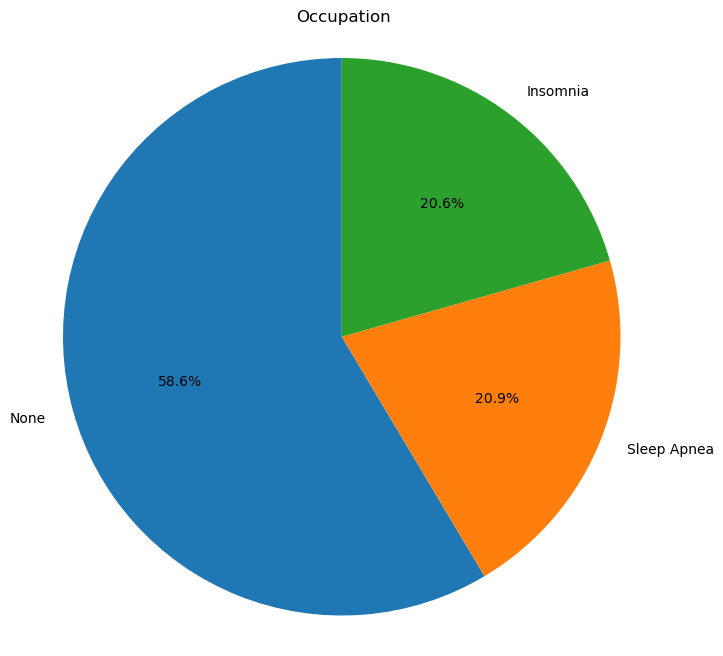

In [49]:
# Calculate the counts of each unique value in the 'Gender' column
gender_counts = df['Sleep Disorder'].value_counts()

# Extract the labels and sizes from the counts
labels = gender_counts.index
sizes = gender_counts.values

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Occupation')
plt.show()

In [50]:
df['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [51]:
df[df['BMI Category'] == 'Normal Weight']['BMI Category'].value_counts()

Normal Weight    21
Name: BMI Category, dtype: int64

In [52]:
df[df['BMI Category'] == 'Normal Weight']

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,age_group
Person ID,,,,,,,,,,,,,
17,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea,27-30
19,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Insomnia,27-30
31,Female,30,Nurse,6.4,5,35,7,Normal Weight,130/86,78,4100,Sleep Apnea,30-39
32,Female,30,Nurse,6.4,5,35,7,Normal Weight,130/86,78,4100,Insomnia,30-39
33,Female,31,Nurse,7.9,8,75,4,Normal Weight,117/76,69,6800,None,30-39
67,Male,32,Accountant,7.2,8,50,6,Normal Weight,118/76,68,7000,None,30-39
85,Male,35,Software Engineer,7.5,8,60,5,Normal Weight,120/80,70,8000,None,30-39
93,Male,35,Software Engineer,7.5,8,60,5,Normal Weight,120/80,70,8000,None,30-39
108,Male,37,Engineer,7.8,8,70,4,Normal Weight,120/80,68,7000,None,30-39


In [53]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [54]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,age_group
Person ID,,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,27-30
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,27-30
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,27-30
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,27-30
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,27-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,50-59
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,50-59
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,50-59


In [55]:
df[df['BMI Category'] == 'Normal Weight']

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,age_group
Person ID,,,,,,,,,,,,,


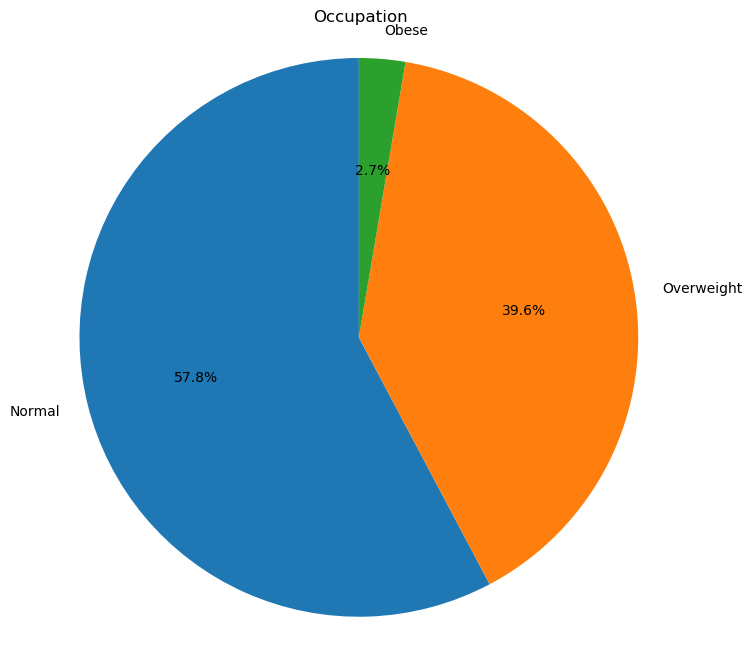

In [56]:
# Calculate the counts of each unique value in the 'Gender' column
gender_counts = df['BMI Category'].value_counts()

# Extract the labels and sizes from the counts
labels = gender_counts.index
sizes = gender_counts.values

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Occupation')
plt.show()

In [57]:
df['BMI Category'].value_counts()

Normal        216
Overweight    148
Obese          10
Name: BMI Category, dtype: int64

In [61]:
df = df.drop('age_group', axis=1)

In [62]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [64]:
df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 46.1+ KB


In [67]:
df.shape

(374, 12)

In [69]:
Categorical_Col = []
Numerical_Col = []

for col in df.columns:
    if df[col].dtype == 'object':
        Categorical_Col.append(col)
       
    else:
        Numerical_Col.append(col)

In [70]:
Categorical_Col

['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']

In [71]:
Numerical_Col

['Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'Heart Rate',
 'Daily Steps']

In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
LE = LabelEncoder()

In [74]:
for col in Categorical_Col:
    df[col] = LE.fit_transform(df[col])

In [75]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,1,27,9,6.1,6,42,6,2,11,77,4200,1
2,1,28,1,6.2,6,60,8,0,9,75,10000,1
3,1,28,1,6.2,6,60,8,0,9,75,10000,1
4,1,28,6,5.9,4,30,8,1,22,85,3000,2
5,1,28,6,5.9,4,30,8,1,22,85,3000,2


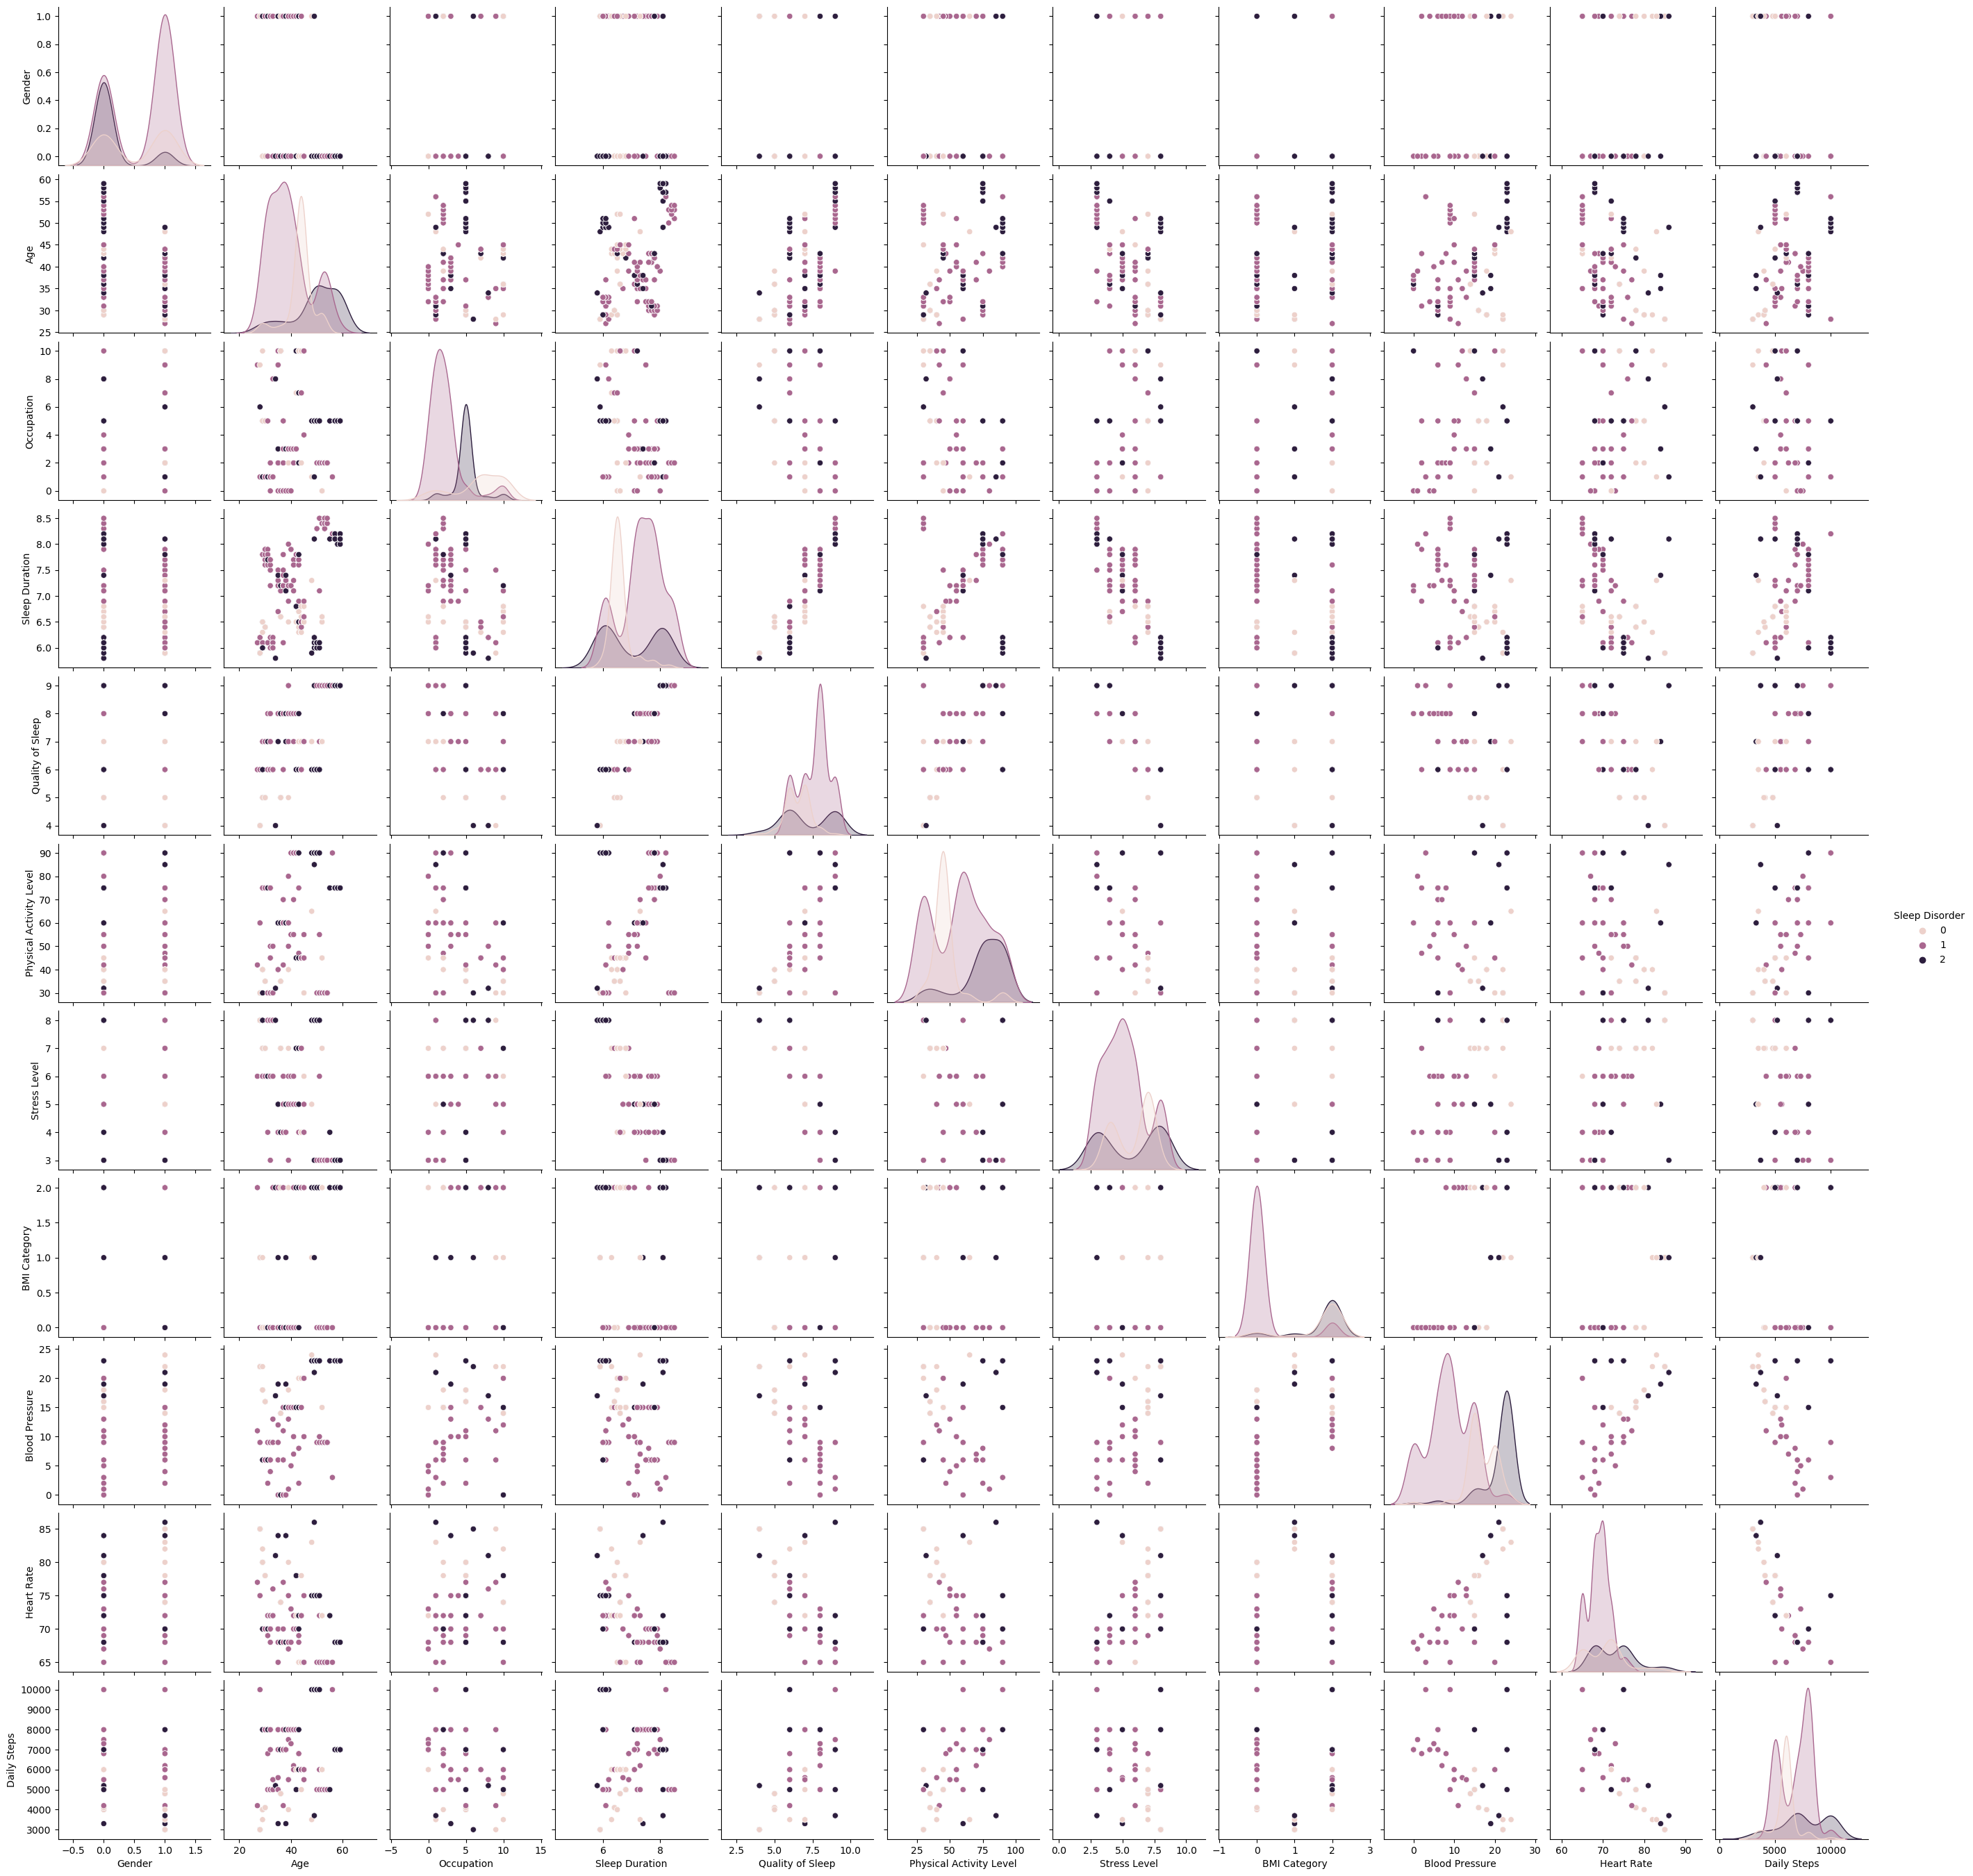

In [76]:
sns.pairplot(df, hue='Sleep Disorder')
plt.show()

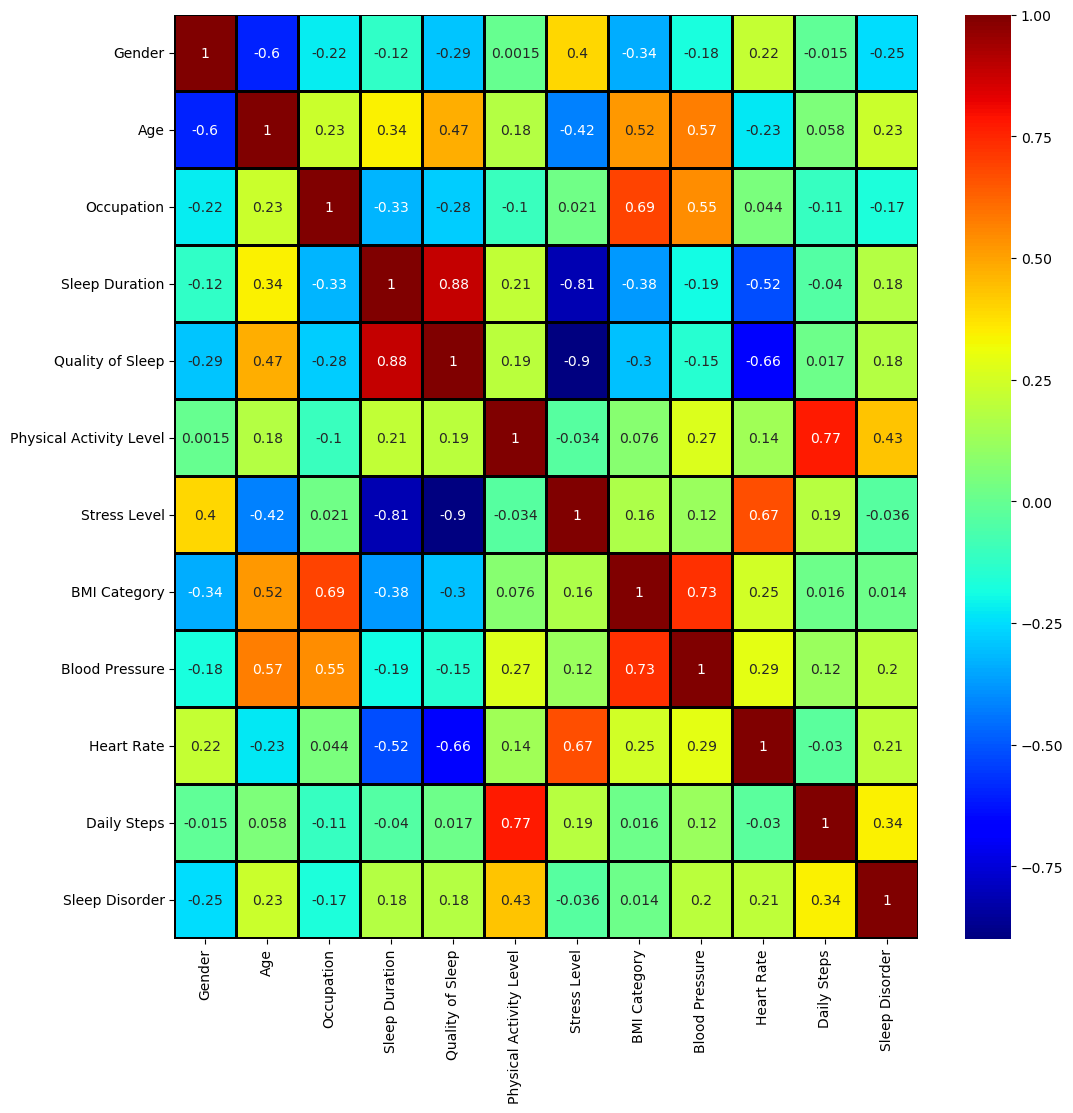

In [77]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap='jet', linewidths=1, linecolor='black', annot=True)
plt.show()

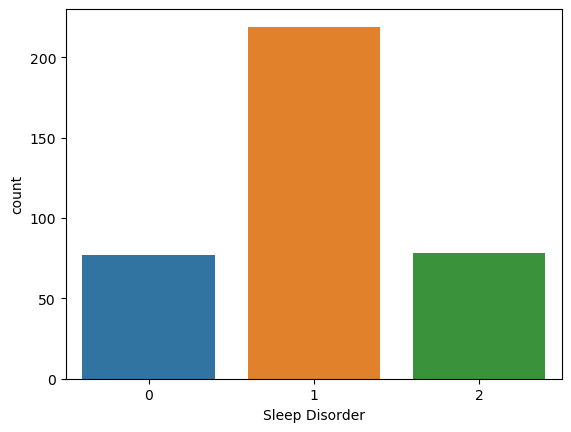

In [78]:
sns.countplot(data=df, x='Sleep Disorder')
plt.show()

In [79]:
from sklearn.model_selection import train_test_split

In [81]:
X = df.iloc[:,:-1]
X

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
Person ID,,,,,,,,,,,
1,1,27,9,6.1,6,42,6,2,11,77,4200
2,1,28,1,6.2,6,60,8,0,9,75,10000
3,1,28,1,6.2,6,60,8,0,9,75,10000
4,1,28,6,5.9,4,30,8,1,22,85,3000
5,1,28,6,5.9,4,30,8,1,22,85,3000
...,...,...,...,...,...,...,...,...,...,...,...
370,0,59,5,8.1,9,75,3,2,23,68,7000
371,0,59,5,8.0,9,75,3,2,23,68,7000
372,0,59,5,8.1,9,75,3,2,23,68,7000


In [82]:
y = df['Sleep Disorder']
y

Person ID
1      1
2      1
3      1
4      2
5      2
      ..
370    2
371    2
372    2
373    2
374    2
Name: Sleep Disorder, Length: 374, dtype: int32

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
RNF = RandomForestClassifier()

In [86]:
RNF.fit(X_train, y_train)

RandomForestClassifier()

In [87]:
y_hat = RNF.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [89]:
print(accuracy_score(y_test, y_hat))

0.8936170212765957


In [90]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.70      0.82      0.76        17
           1       0.96      0.98      0.97        55
           2       0.89      0.73      0.80        22

    accuracy                           0.89        94
   macro avg       0.85      0.84      0.84        94
weighted avg       0.90      0.89      0.89        94



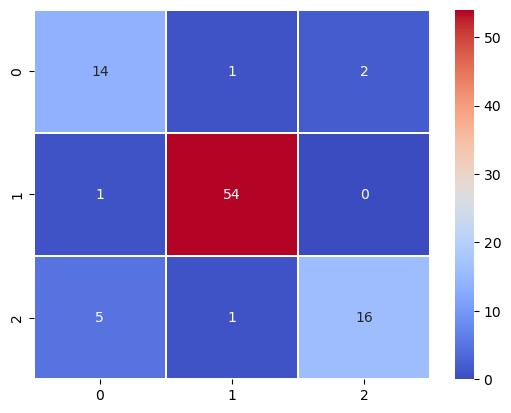

In [91]:
sns.heatmap(confusion_matrix(y_test, y_hat), cmap='coolwarm', linecolor='white', linewidths=1, annot=True)
plt.show()

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier